[*********************100%%**********************]  1 of 1 completed


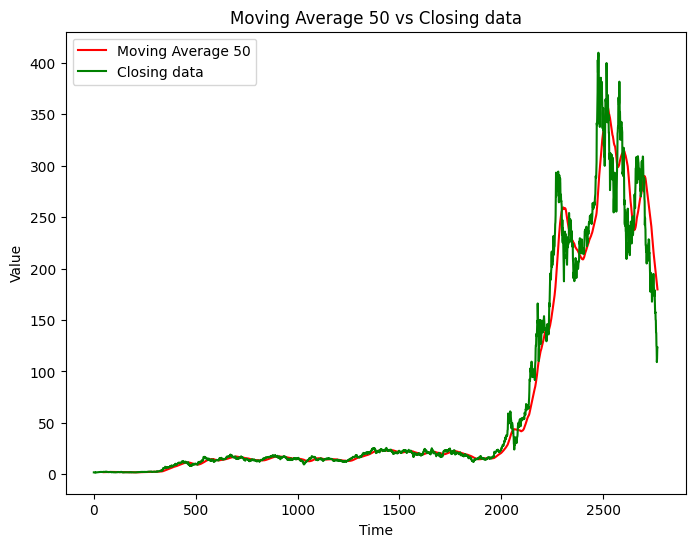

c:\Users\Shashank\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
68/68 - 10s - 151ms/step - loss: 0.0159
Epoch 2/50
68/68 - 4s - 65ms/step - loss: 0.0036
Epoch 3/50
68/68 - 4s - 55ms/step - loss: 0.0023
Epoch 4/50
68/68 - 5s - 69ms/step - loss: 0.0024
Epoch 5/50
68/68 - 5s - 70ms/step - loss: 0.0019
Epoch 6/50
68/68 - 5s - 72ms/step - loss: 0.0018
Epoch 7/50
68/68 - 5s - 74ms/step - loss: 0.0015
Epoch 8/50
68/68 - 5s - 74ms/step - loss: 0.0016
Epoch 9/50
68/68 - 5s - 71ms/step - loss: 0.0018
Epoch 10/50
68/68 - 4s - 52ms/step - loss: 0.0016
Epoch 11/50
68/68 - 5s - 71ms/step - loss: 0.0011
Epoch 12/50
68/68 - 5s - 70ms/step - loss: 0.0014
Epoch 13/50
68/68 - 5s - 70ms/step - loss: 0.0013
Epoch 14/50
68/68 - 5s - 72ms/step - loss: 0.0013
Epoch 15/50
68/68 - 5s - 76ms/step - loss: 0.0014
Epoch 16/50
68/68 - 4s - 65ms/step - loss: 0.0013
Epoch 17/50
68/68 - 4s - 65ms/step - loss: 0.0012
Epoch 18/50
68/68 - 6s - 84ms/step - loss: 0.0014
Epoch 19/50
68/68 - 6s - 84ms/step - loss: 0.0014
Epoch 20/50
68/68 - 6s - 84ms/step - loss: 0.0012
Epoch 2

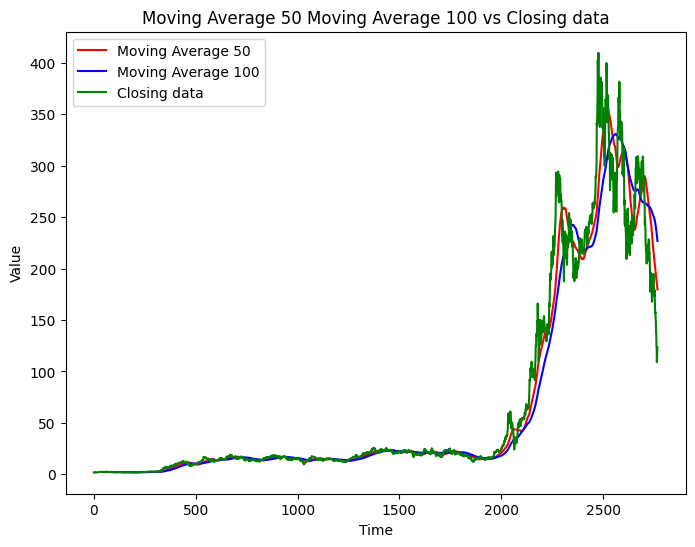

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


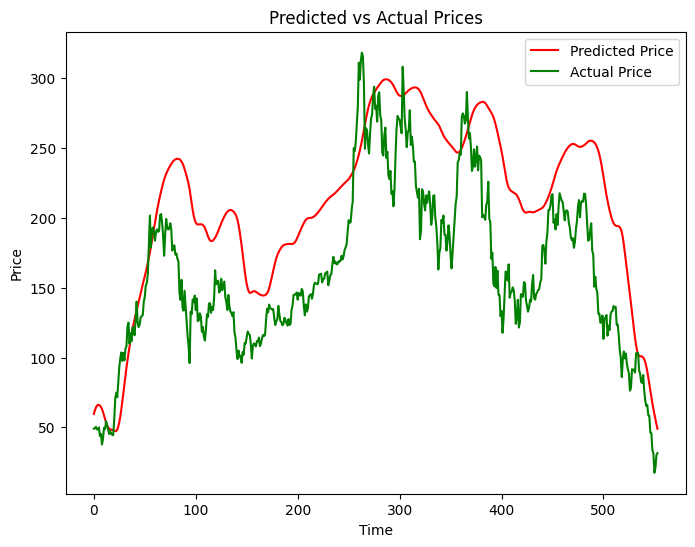

In [1]:
import numpy as np          #numerical operation 
import pandas as pd         #data manipulation 
import yfinance as yf       # data set 
import matplotlib.pyplot as plt     #plot
from sklearn.preprocessing import MinMaxScaler      #to scale the data
from keras.layers import Dense, Dropout, LSTM       #to build and train lstm model
from keras.models import Sequential
from sklearn.metrics import mean_squared_error,mean_absolute_error      #to evaluate model performance 

# Downloading stock data using yfinance
start = '2012-01-01'
end = '2023-01-01'
stock = 'TSLA'

data = yf.download(stock, start, end)
data.reset_index(inplace=True)

# Calculating moving averages
ma_50_days = data.Close.rolling(50).mean()
plt.figure(figsize=(8, 6))
plt.plot(ma_50_days, 'r',label='Moving Average 50')
plt.plot(data.Close, 'g',label='Closing data')
plt.title('Moving Average 50 vs Closing data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Prepare data
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0:int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80):len(data)])

scaler = MinMaxScaler(feature_range=(0, 1))
data_train_array = scaler.fit_transform(data_train)

x = []
y = []
for i in range(50, data_train.shape[0]):
    x.append(data_train_array[i - 50:i])
    y.append(data_train_array[i, 0])

x, y= np.array(x), np.array(y)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=50, batch_size=32, verbose=2)

#ma100

ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8, 6))
plt.plot(ma_50_days, 'r',label='Moving Average 50')
plt.plot(ma_100_days, 'b',label='Moving Average 100')
plt.plot(data.Close, 'g',label='Closing data')
plt.title('Moving Average 50 Moving Average 100 vs Closing data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Prepare test data
pas_50_days = data_train.tail(50)
data_test = pd.concat([pas_50_days, data_test], ignore_index=True)
data_test_array= scaler.fit_transform(data_test)

x= []
y = []
for i in range(50, data_test.shape[0]):
    x.append(data_test_array[i - 50:i])
    y.append(data_test_array[i, 0])


x= []
y = []
for i in range(50, data_test.shape[0]):
    x.append(data_test_array[i - 50:i])
    y.append(data_test_array[i, 0])

x, y = np.array(x), np.array(y)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predictions
y_pred = model.predict(x)

# Inverse scaling to get back original values
scale=1/scaler.scale_
y_pred = y_pred*scale
y=y*scale

# Plotting predictions and actual prices
plt.figure(figsize=(8, 6))
plt.plot(y_pred, label='Predicted Price', color='red')
plt.plot(y, label='Actual Price', color='green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Save the model
model.save('stock_price_prediction_model.keras')
